In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [36]:
carPrice = pd.read_csv('car data.csv')

In [37]:
carPrice.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
carPrice.shape

(301, 9)

In [39]:
carPrice.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [40]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
print(carPrice.Fuel_Type.value_counts())
print(carPrice.Seller_Type.value_counts())
print(carPrice.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [42]:
carPrice.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
carPrice.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
carPrice.replace({'Transmission':{'Manual':0, 'Automatic': 1}}, inplace = True )

In [43]:
carPrice.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [44]:
x = carPrice.drop(['Car_Name','Selling_Price'], axis=1)
y = carPrice['Selling_Price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 2)
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [46]:
lin_reg = LinearRegression()

In [47]:
# Linear Regression

In [48]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [49]:
training_data_prediction = lin_reg.predict(x_train)


In [50]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R suqared error = ",error_score)

R suqared error =  0.8799451660493708


In [51]:
test_data_prediction = lin_reg.predict(x_test)

In [52]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.8365766715026374


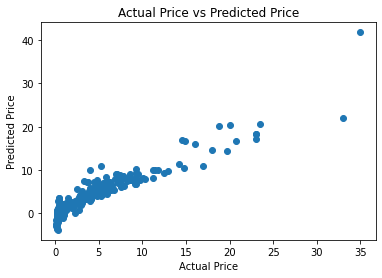

In [53]:
# scatter plot for training data prediction

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

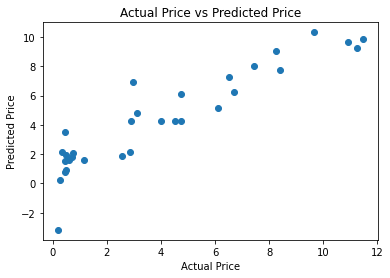

In [54]:
# scatter plot for test data prediction

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [55]:
# Lasso Regression

In [56]:
lasso_reg = Lasso()

In [57]:
lasso_reg.fit(x_train, y_train)

Lasso()

In [58]:
training_data_prediction = lasso_reg.predict(x_train)

In [59]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared value = ", error_score)

R squared value =  0.8427856123435794


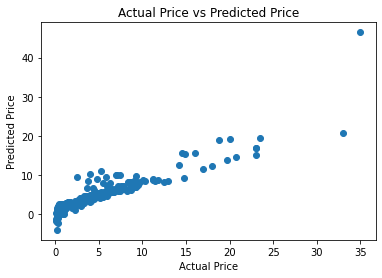

In [60]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [61]:
test_data_prediction = lasso_reg.predict(x_test)

In [62]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared value = ", error_score)

R squared value =  0.8709167941173195


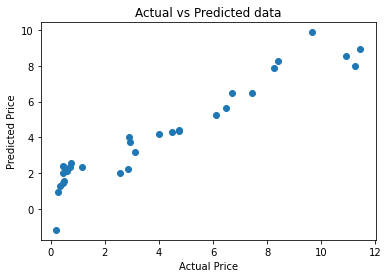

In [63]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted data")
plt.show()

In [64]:
# buliding a predictive system

In [67]:
input = (2014, 5.59, 27000, 0, 0, 0, 0)
input_data_as_numpy_array = np.array(input)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = lasso_reg.predict(input_data_reshaped)
print(prediction)

[3.8257306]


c:\Users\Ratul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
